In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 한글 폰트 설치
!apt-get update -qq
!apt-get install -y fonts-nanum


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,908 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 한글 폰트 설정 (NanumGothic 기준)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = font_manager.FontProperties(fname=font_path)



In [ ]:
file_path = "/content/drive/MyDrive/파이널프로젝트/train/4.청구입금정보/청구입금정보_201807_201812.csv"
df_bill = pd.read_csv(file_path, encoding='utf-8')  # 또는 encoding='cp949' (한글 깨질 경우)
df_bill.head()


,기준년월,ID,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,할인금액_청구서_B0M,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액
0,201807,TRAIN_000000,27,자동이체,미확인,당사페이앱+이메일,문자메세지,1,1,1,...,0,5,3,0,0,1,0,3,0,0
1,201807,TRAIN_000001,13,자동이체,주거지,우편,우편,1,1,1,...,163,6,3,0,0,0,0,0,0,0
2,201807,TRAIN_000002,1,자동이체,미확인,이메일,이메일,1,1,1,...,0,6,3,0,0,0,0,121,0,50
3,201807,TRAIN_000003,5,자동이체,주거지,우편,우편,1,1,1,...,0,5,3,2,0,0,0,3,0,2
4,201807,TRAIN_000004,13,자동이체,주거지,우편,우편,0,1,1,...,0,1,1,0,0,0,0,0,0,0


In [ ]:
df_bill.shape              # 행, 열 개수
df_bill.columns.tolist()   # 컬럼명 목록
df_bill.info()             # 데이터 타입 및 결측치
df_bill.describe()         # 수치형 요약 통계

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 46 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   기준년월              int64 
 1   ID                object
 2   대표결제일             int64 
 3   대표결제방법코드          object
 4   대표청구지고객주소구분코드     object
 5   대표청구서수령지구분코드      object
 6   청구서수령방법           object
 7   청구서발송여부_B0        int64 
 8   청구서발송여부_R3M       int64 
 9   청구서발송여부_R6M       int64 
 10  청구금액_B0           int64 
 11  청구금액_R3M          int64 
 12  청구금액_R6M          int64 
 13  포인트_마일리지_건별_B0M   int64 
 14  포인트_마일리지_건별_R3M   int64 
 15  포인트_포인트_건별_B0M    int64 
 16  포인트_포인트_건별_R3M    int64 
 17  포인트_마일리지_월적립_B0M  int64 
 18  포인트_마일리지_월적립_R3M  int64 
 19  포인트_포인트_월적립_B0M   int64 
 20  포인트_포인트_월적립_R3M   int64 
 21  포인트_적립포인트_R12M    int64 
 22  포인트_적립포인트_R3M     int64 
 23  포인트_이용포인트_R12M    int64 
 24  포인트_이용포인트_R3M     int64 
 25  포인트_잔여포인트_B0M     int64 
 26  마일_적립포인트_R12M     int64 
 27  마일_적립포인트_R3M

,기준년월,대표결제일,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,포인트_마일리지_건별_R3M,...,할인금액_청구서_B0M,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액
count,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,...,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06
mean,2.018095e+05,1.698160e+01,7.718217e-01,7.974500e-01,8.468004e-01,5.064259e+03,1.572770e+04,3.299467e+04,3.567914e+01,1.034702e+02,...,4.054702e+01,3.953235e+00,2.017534e+00,3.219975e-01,1.664700e-01,4.401200e-01,2.200033e-01,1.196929e+02,7.931706e+00,3.947959e+01
std,1.707825e+00,8.823241e+00,4.196583e-01,4.018999e-01,3.601799e-01,7.849599e+03,2.356815e+04,4.889607e+04,2.167232e+02,6.309971e+02,...,8.380160e+01,2.410088e+00,1.276438e+00,1.106370e+00,6.177793e-01,1.190357e+00,6.809408e-01,2.241073e+02,3.889657e+01,7.456806e+01
min,2.018070e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.018080e+05,1.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.020000e+02,5.300000e+02,1.477000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.018095e+05,2.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.411000e+03,7.762000e+03,1.646400e+04,0.000000e+00,0.000000e+00,...,0.000000e+00,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.018110e+05,2.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,6.508000e+03,2.044600e+04,4.282400e+04,0.000000e+00,0.000000e+00,...,1.200000e+01,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.430000e+02,0.000000e+00,5.000000e+01
max,2.018120e+05,2.700000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.100060e+05,5.322610e+05,1.112355e+06,3.141000e+03,1.140400e+04,...,6.880000e+02,6.000000e+00,3.000000e+00,8.000000e+00,4.000000e+00,8.000000e+00,4.000000e+00,3.754000e+03,6.070000e+02,8.570000e+02


# 상관분석

In [ ]:
# 수치형 변수만 선택
df_numeric = df_bill.select_dtypes(include=['float64', 'int64'])

# 상관행렬 계산
corr_matrix = df_numeric.corr().abs()


In [ ]:
# 중복 방지를 위한 마스킹
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 상관계수 0.9 이상인 컬럼 추출
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

print(f"제거할 컬럼 수: {len(to_drop)}")
print("제거할 컬럼 목록:\n", to_drop)


제거할 컬럼 수: 17
제거할 컬럼 목록:
 ['청구금액_R3M', '청구금액_R6M', '포인트_마일리지_건별_R3M', '포인트_포인트_건별_R3M', '포인트_마일리지_월적립_R3M', '포인트_이용포인트_R3M', '마일_적립포인트_R12M', '마일_이용포인트_R12M', '마일_이용포인트_R3M', '마일_잔여포인트_B0M', '할인금액_B0M', '할인금액_청구서_B0M', '상환개월수_결제일_R3M', '선결제건수_R3M', '연체건수_R3M', '포인트_마일리지_환산_B0M', '혜택수혜금액']


In [ ]:
df_bill_reduced = df_bill.drop(columns=to_drop)


In [ ]:
# 원래 vs 제거 후 컬럼 수
print(f"원래 컬럼 수: {df_bill.shape[1]}")
print(f"제거 후 컬럼 수: {df_bill_reduced.shape[1]}")

# 제거 후 남은 컬럼 목록 보기
print("\n✅ 제거 후 남은 컬럼 목록:")
for col in df_bill_reduced.columns:
    print(f"- {col}")


원래 컬럼 수: 46
제거 후 컬럼 수: 30

✅ 제거 후 남은 컬럼 목록:
- 기준년월
- ID
- 대표결제일
- 대표결제방법코드
- 대표청구지고객주소구분코드
- 대표청구서수령지구분코드
- 청구서수령방법
- 청구서발송여부_B0
- 청구서발송여부_R3M
- 청구서발송여부_R6M
- 청구금액_B0
- 포인트_마일리지_건별_B0M
- 포인트_포인트_건별_B0M
- 포인트_마일리지_월적립_B0M
- 포인트_포인트_월적립_B0M
- 포인트_포인트_월적립_R3M
- 포인트_적립포인트_R12M
- 포인트_적립포인트_R3M
- 포인트_이용포인트_R12M
- 포인트_잔여포인트_B0M
- 마일_적립포인트_R3M
- 할인건수_R3M
- 할인금액_R3M
- 할인건수_B0M
- 할인금액_청구서_R3M
- 상환개월수_결제일_R6M
- 선결제건수_R6M
- 연체건수_R6M
- 혜택수혜금액_R3M
- Segment


In [ ]:
# 회원정보 파일 경로 (예시)
file_path_member = "/content/drive/MyDrive/파이널프로젝트/train/1.회원정보/201807_train_회원정보.parquet"

# 회원정보 파일 불러오기
df_member = pd.read_csv(file_path_member)

# 필요한 컬럼만 추출
df_member = df_member[['ID', 'Segment']]


In [ ]:
# Segment 병합
df_bill_reduced = df_bill_reduced.merge(df_member, on='ID', how='left')


# EDA

## 그룹핑진행

In [ ]:
group_vars = {
    '기본': [
        '기준년월', 'ID', 'Segment'
    ],

    '청구정보': [
        '대표결제일', '대표결제방법코드', '청구금액_B0'
    ],

    '청구서수령': [
        '대표청구지고객주소구분코드',
        '대표청구서수령지구분코드',
        '청구서수령방법',
        '청구서발송여부_B0',
        '청구서발송여부_R3M',
        '청구서발송여부_R6M'
    ],

    '포인트마일리지': [
        '포인트_마일리지_건별_B0M',
        '포인트_포인트_건별_B0M',
        '포인트_마일리지_월적립_B0M',
        '포인트_포인트_월적립_B0M',
        '포인트_포인트_월적립_R3M',
        '포인트_적립포인트_R12M',
        '포인트_적립포인트_R3M',
        '포인트_이용포인트_R12M',
        '포인트_잔여포인트_B0M',
        '마일_적립포인트_R3M'
    ],

    '할인': [
        '할인건수_R3M',
        '할인금액_R3M',
        '할인건수_B0M',
        '할인금액_청구서_R3M'
    ],

    '연체선결제상환': [
        '상환개월수_결제일_R6M',
        '선결제건수_R6M',
        '연체건수_R6M'
    ],

    '혜택': [
        '혜택수혜금액_R3M'
    ]
}



In [ ]:
# 그룹별 포함된 컬럼 목록 출력
for group, cols in group_vars.items():
    print(f"🔹 {group} ({len(cols)}개)")
    for col in cols:
        print(f"  - {col}")
    print()


🔹 기본 (3개)
  - 기준년월
  - ID
  - Segment

🔹 청구정보 (3개)
  - 대표결제일
  - 대표결제방법코드
  - 청구금액_B0

🔹 청구서수령 (6개)
  - 대표청구지고객주소구분코드
  - 대표청구서수령지구분코드
  - 청구서수령방법
  - 청구서발송여부_B0
  - 청구서발송여부_R3M
  - 청구서발송여부_R6M

🔹 포인트마일리지 (10개)
  - 포인트_마일리지_건별_B0M
  - 포인트_포인트_건별_B0M
  - 포인트_마일리지_월적립_B0M
  - 포인트_포인트_월적립_B0M
  - 포인트_포인트_월적립_R3M
  - 포인트_적립포인트_R12M
  - 포인트_적립포인트_R3M
  - 포인트_이용포인트_R12M
  - 포인트_잔여포인트_B0M
  - 마일_적립포인트_R3M

🔹 할인 (4개)
  - 할인건수_R3M
  - 할인금액_R3M
  - 할인건수_B0M
  - 할인금액_청구서_R3M

🔹 연체선결제상환 (3개)
  - 상환개월수_결제일_R6M
  - 선결제건수_R6M
  - 연체건수_R6M

🔹 혜택 (1개)
  - 혜택수혜금액_R3M



##청구정보그룹 시각화

In [ ]:
billing_cols = group_vars['청구정보']


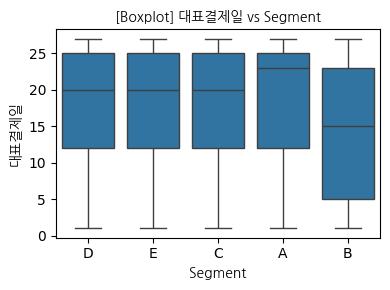

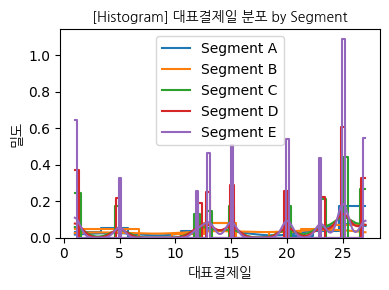

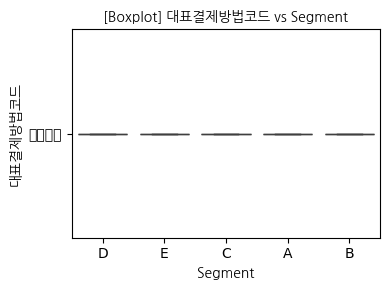

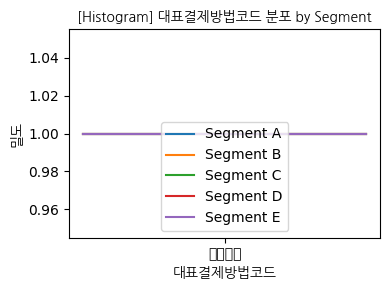

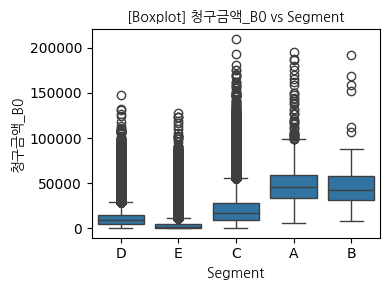

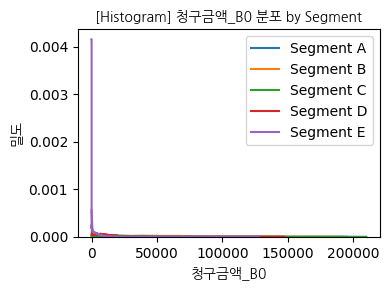

In [ ]:
# 시각화
for col in billing_cols:
    if col not in df_bill_reduced.columns:
        print(f"[{col}] 컬럼 없음: 건너뜀")
        continue

    # Boxplot
    plt.figure(figsize=(4, 3))
    sns.boxplot(x='Segment', y=col, data=df_bill_reduced)
    plt.title(f"[Boxplot] {col} vs Segment", fontproperties=font_prop)
    plt.xlabel("Segment", fontproperties=font_prop)
    plt.ylabel(col, fontproperties=font_prop)
    plt.tight_layout()
    plt.show()

    # Histogram
    plt.figure(figsize=(4, 3))
    for segment in sorted(df_bill_reduced['Segment'].dropna().unique()):
        sns.histplot(data=df_bill_reduced[df_bill_reduced['Segment'] == segment],
                     x=col, label=f'Segment {segment}', kde=True, stat="density", element="step", fill=False)
    plt.title(f"[Histogram] {col} 분포 by Segment", fontproperties=font_prop)
    plt.xlabel(col, fontproperties=font_prop)
    plt.ylabel("밀도", fontproperties=font_prop)
    plt.legend()
    plt.tight_layout()
    plt.show()

## 대표결제방법코드는 범주형이므로 바차트로 확인

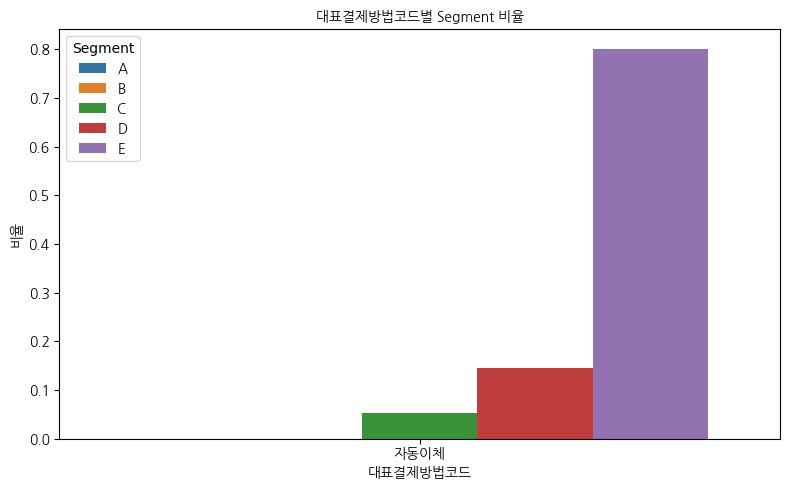

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 한글 폰트 설정 (사용자 환경에 따라 조정 가능)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 또는 다른 경로
font_prop = font_manager.FontProperties(fname=font_path)

# 대표결제방법코드별 Segment 분포 비율 계산
plot_data = (
    df_bill_reduced.groupby(['대표결제방법코드', 'Segment'])
    .size()
    .reset_index(name='count')
)

# 전체 대비 비율로 변환
plot_data['ratio'] = plot_data.groupby('대표결제방법코드')['count'].transform(lambda x: x / x.sum())

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(
    x='대표결제방법코드',
    y='ratio',
    hue='Segment',
    data=plot_data
)
plt.title("대표결제방법코드별 Segment 비율", fontproperties=font_prop)
plt.xlabel("대표결제방법코드", fontproperties=font_prop)
plt.ylabel("비율", fontproperties=font_prop)
plt.legend(title="Segment", prop=font_prop)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.tight_layout()
plt.show()



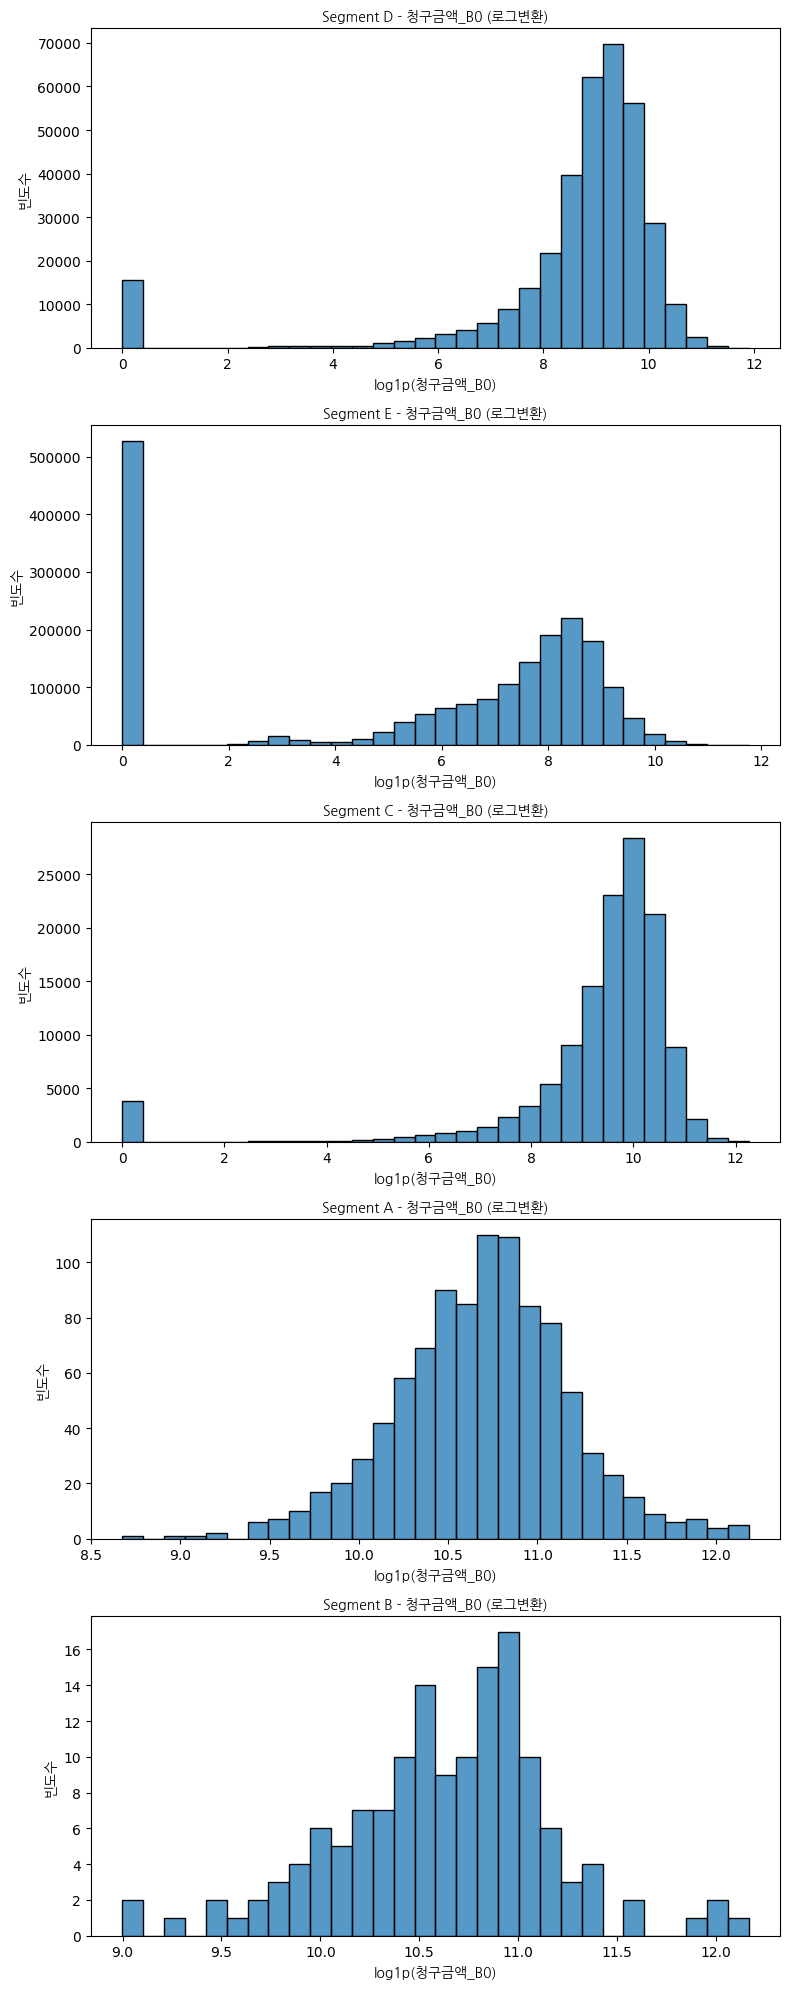

In [ ]:
# 로그변환 컬럼 생성
df_bill_reduced['청구금액_B0_log'] = np.log1p(df_bill_reduced['청구금액_B0'])

# Segment 목록
segments = df_bill_reduced['Segment'].unique()
n_segments = len(segments)

# 시각화
fig, axes = plt.subplots(n_segments, 1, figsize=(8, 4 * n_segments))

for i, segment in enumerate(segments):
    ax = axes[i]
    data = df_bill_reduced[df_bill_reduced['Segment'] == segment]
    sns.histplot(data['청구금액_B0_log'], bins=30, ax=ax, kde=False)
    ax.set_title(f"Segment {segment} - 청구금액_B0 (로그변환)", fontproperties=font_prop)
    ax.set_xlabel("log1p(청구금액_B0)", fontproperties=font_prop)
    ax.set_ylabel("빈도수", fontproperties=font_prop)
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

log1p로 변환하면:

x축의 0은 청구금액_B0 = 0을 의미

x축의 8은 청구금액_B0 ≈ exp(8) - 1 ≈ 2,980원

x축의 10은 청구금액_B0 ≈ exp(10) - 1 ≈ 22,000원

x축의 12는 청구금액_B0 ≈ 162,000원 정도를 의미



결제방법 코드가 자동이체 하나만 있기때문에 무의미함
대표 결제일도 인사이트를 도출하는데 아무도움도 안됨


# 청구서 수령 그룹

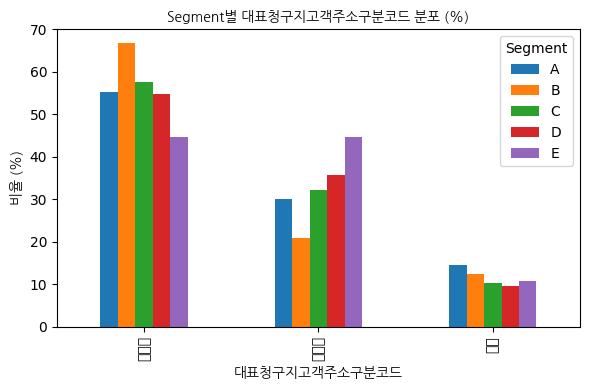

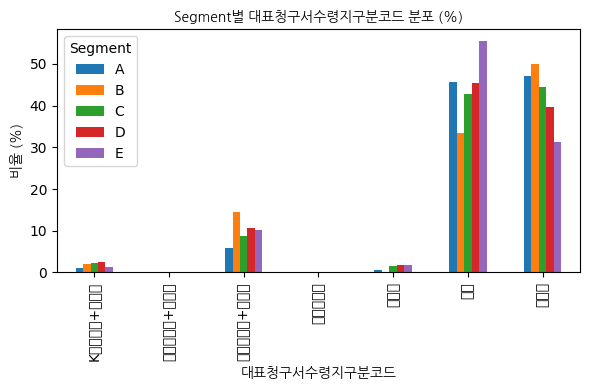

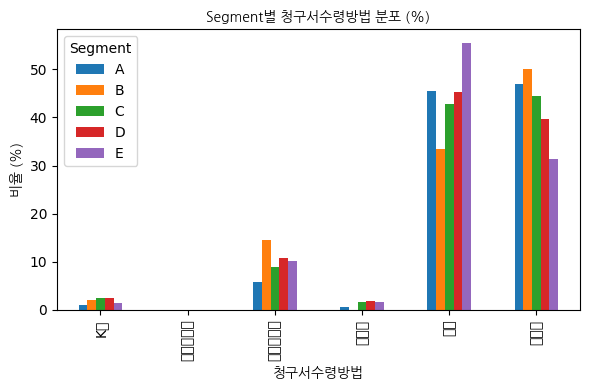

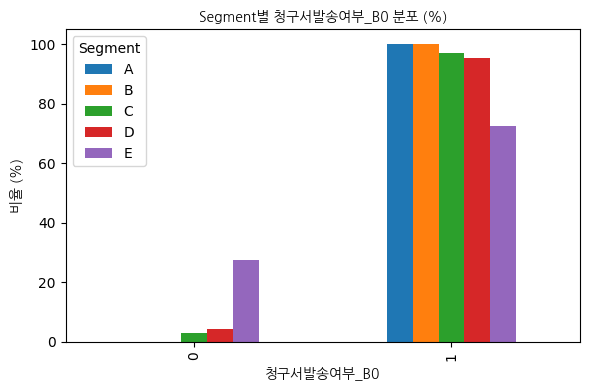

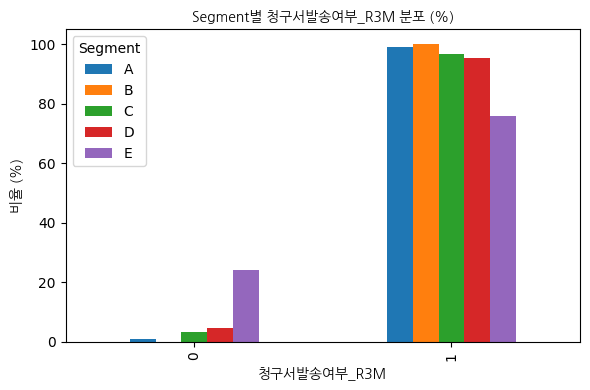

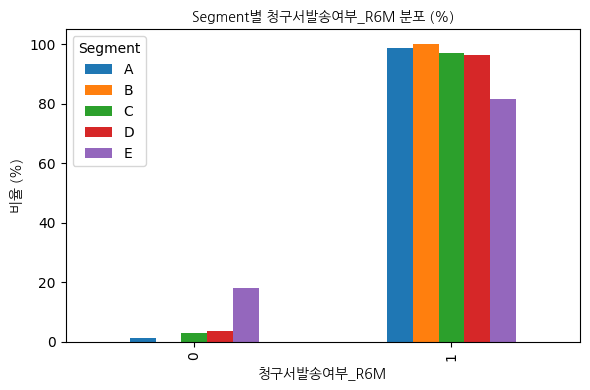

In [ ]:
categorical_cols = [
    '대표청구지고객주소구분코드',
    '대표청구서수령지구분코드',
    '청구서수령방법',
    '청구서발송여부_B0',
    '청구서발송여부_R3M',
    '청구서발송여부_R6M'
]

for col in categorical_cols:
    cross_tab = pd.crosstab(df_bill_reduced[col], df_bill_reduced['Segment'], normalize='columns') * 100

    cross_tab.plot(kind='bar', figsize=(6, 4))
    plt.title(f"Segment별 {col} 분포 (%)", fontproperties=font_prop)
    plt.xlabel(col, fontproperties=font_prop)
    plt.ylabel("비율 (%)", fontproperties=font_prop)
    plt.legend(title='Segment')
    plt.tight_layout()
    plt.show()

청구서 수령 그룹
해당 범주형데이터 그룹은 뭔가 인사이틑 내기가 쉽지않음 삭제하는게 좋을듯


#포인트마일리지 그룹

In [ ]:
def plot_log_hist_segment_filtered(df, col, segment_col='Segment'):
    plt.figure(figsize=(6, 4))
    for seg in sorted(df[segment_col].dropna().unique()):
        data = df[(df[segment_col] == seg) & (df[col] > 0)][col].dropna()
        if len(data) == 0:
            continue
        plt.hist(np.log1p(data), bins=30, alpha=0.5, label=str(seg))
    plt.title(f"Segment별 {col} (로그변환, 0제외)", fontproperties=font_prop)
    plt.xlabel(f"log1p({col})", fontproperties=font_prop)
    plt.ylabel("빈도수", fontproperties=font_prop)
    plt.legend(title='Segment')
    plt.tight_layout()
    plt.show()


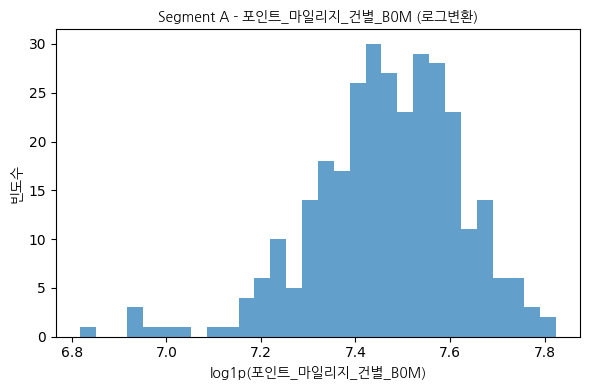

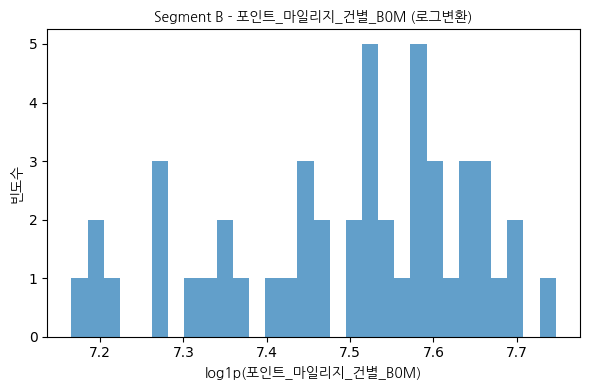

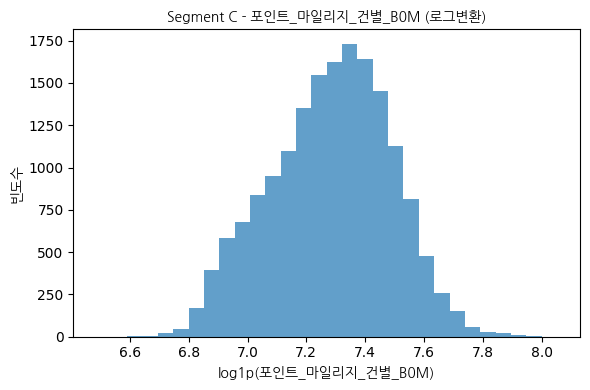

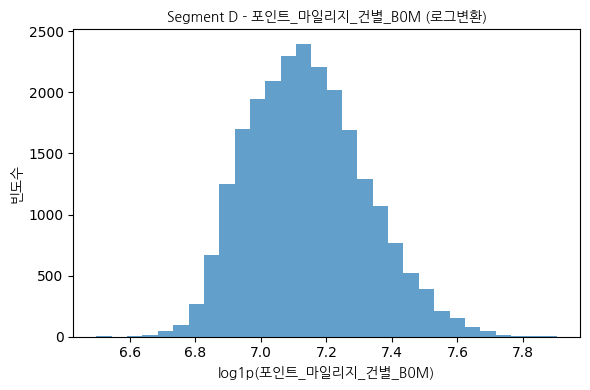

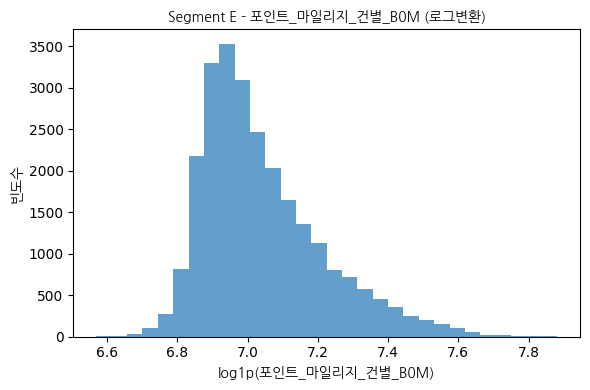

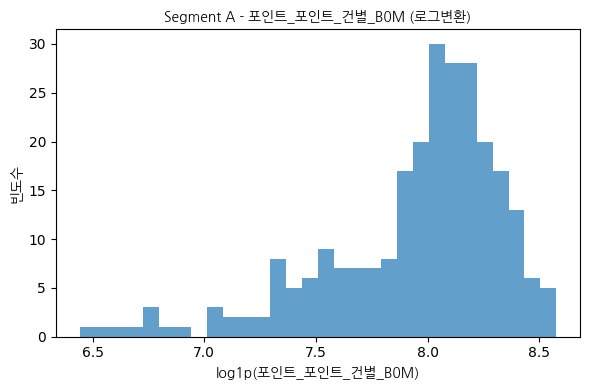

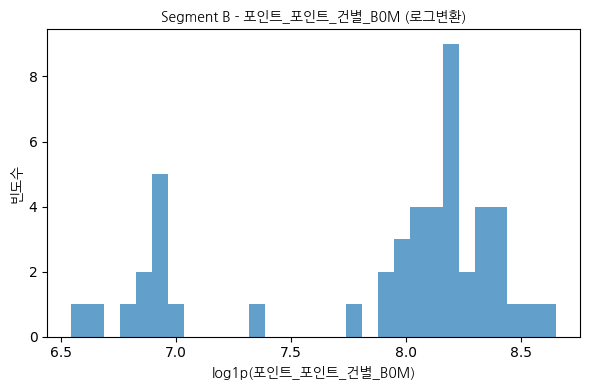

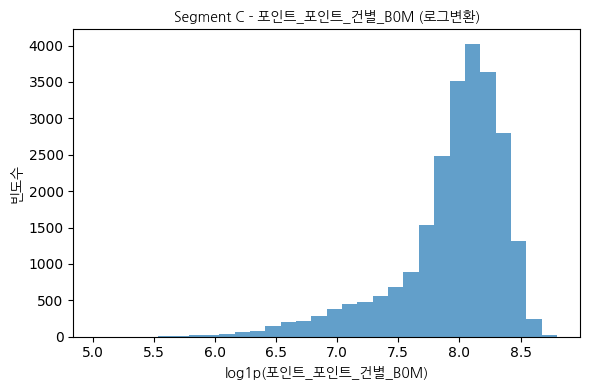

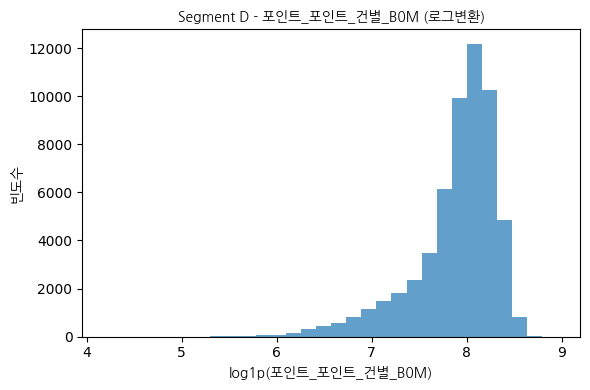

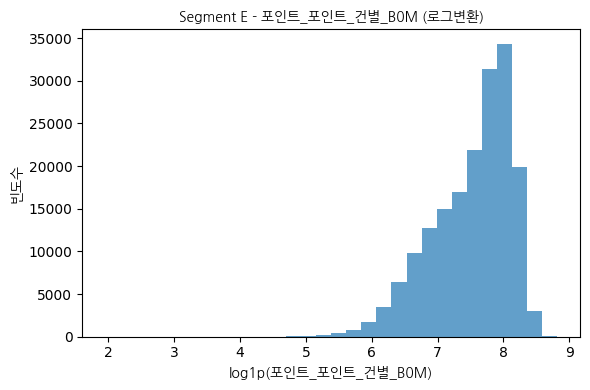

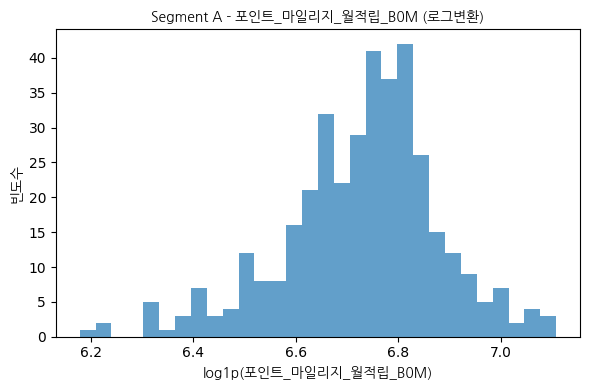

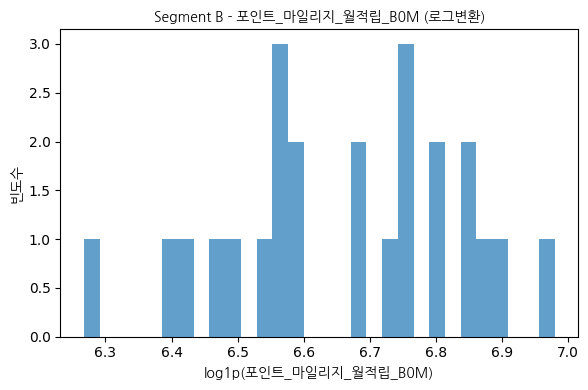

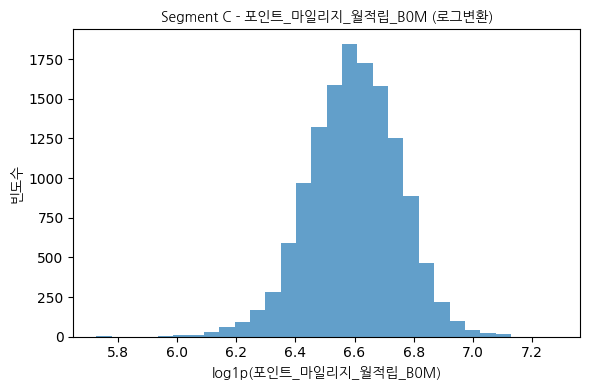

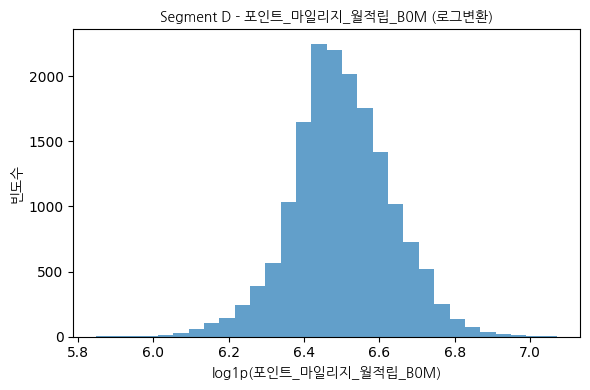

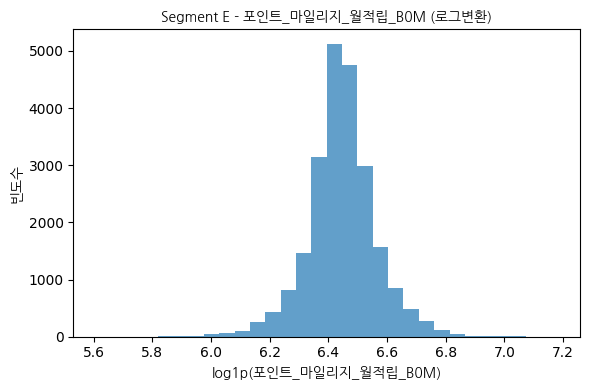

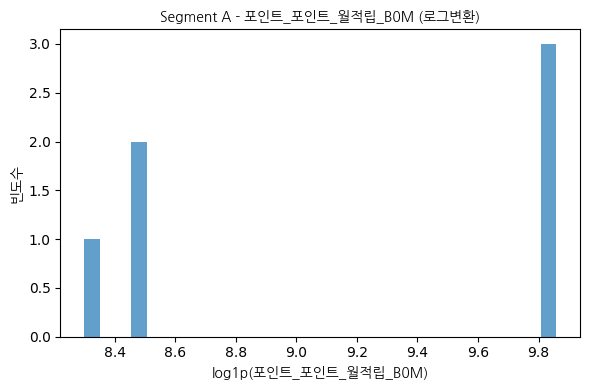

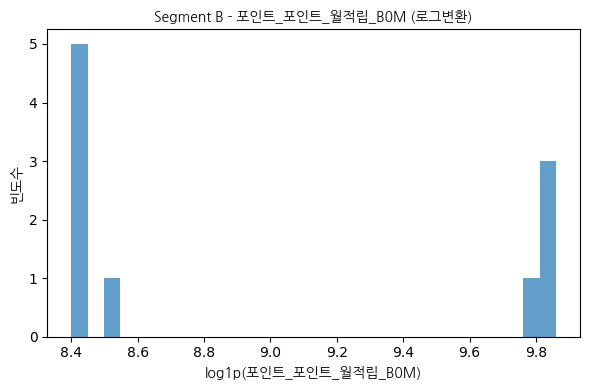

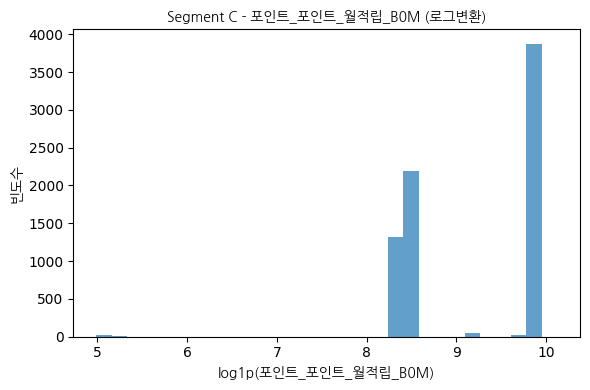

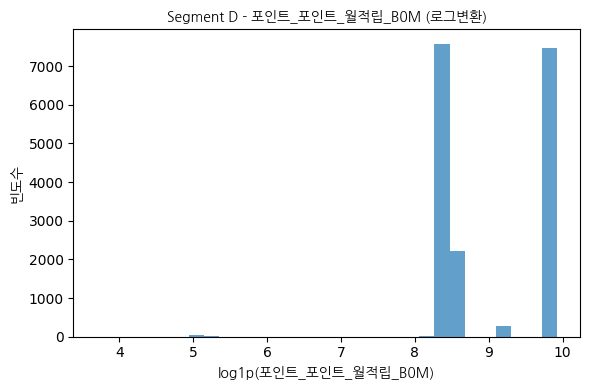

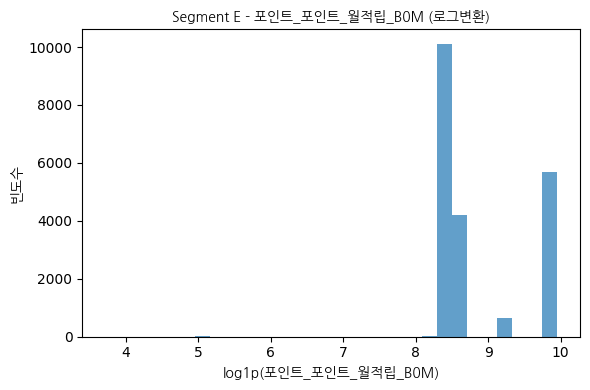

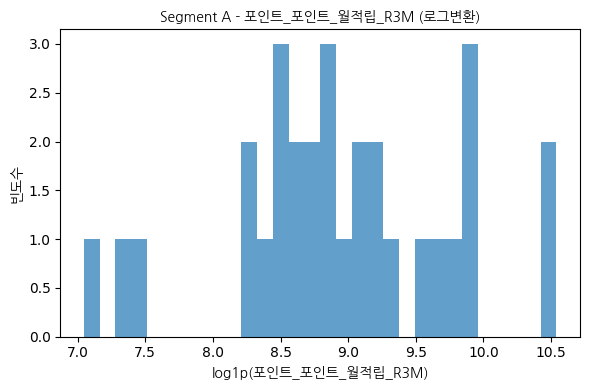

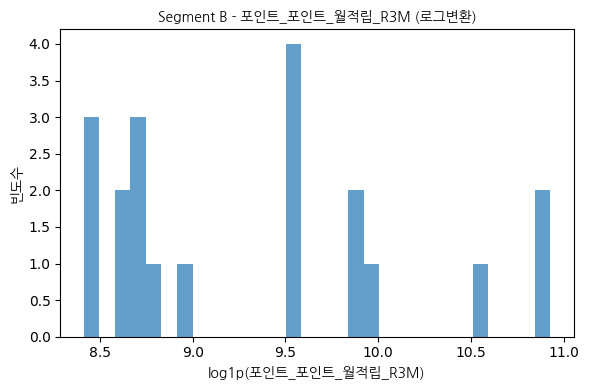

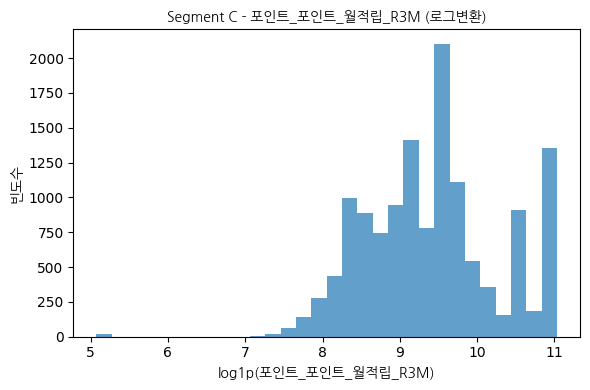

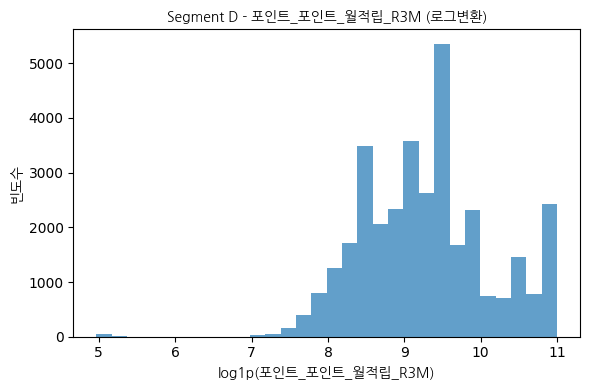

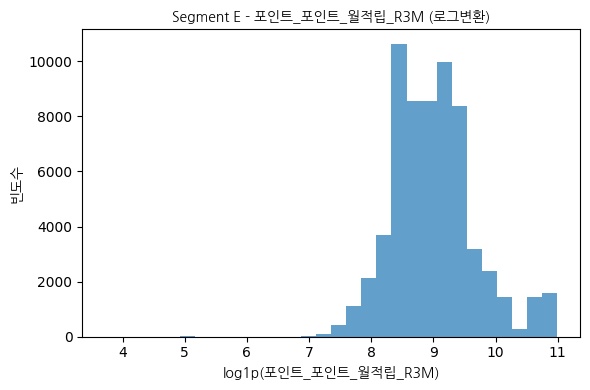

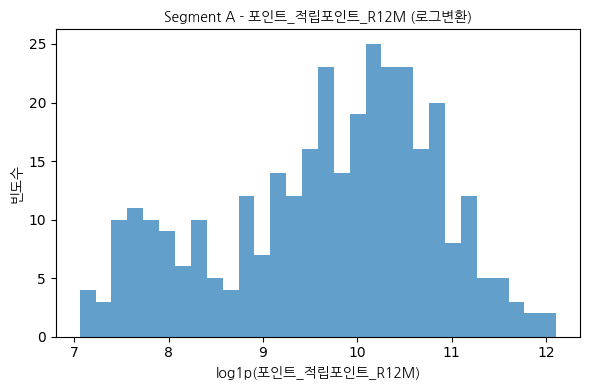

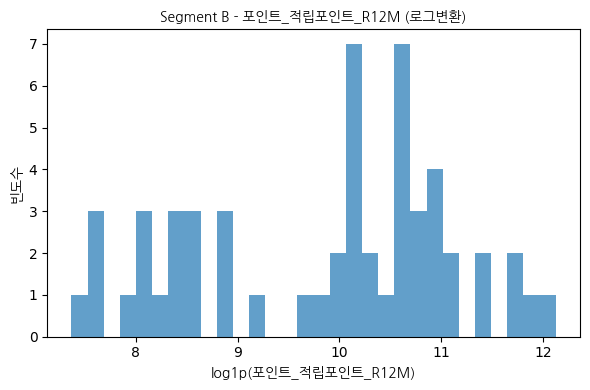

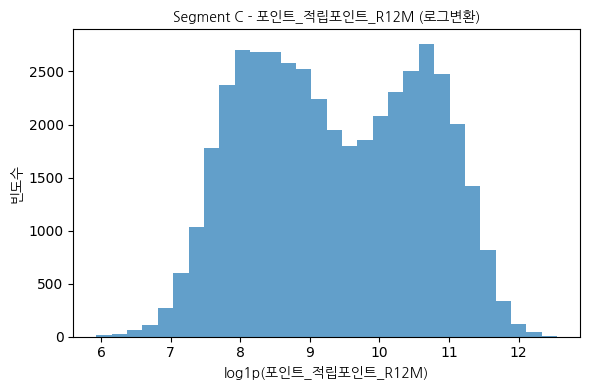

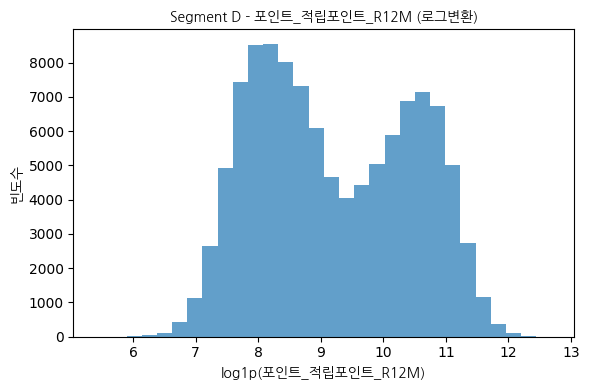

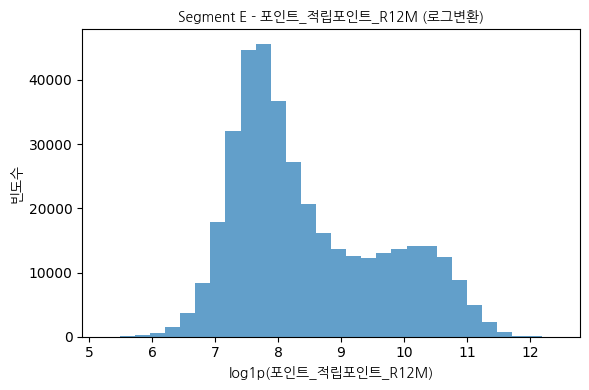

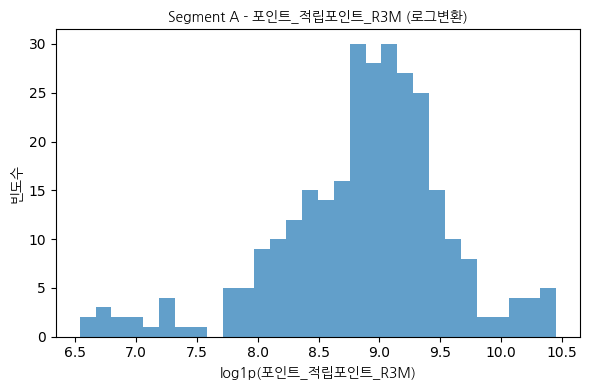

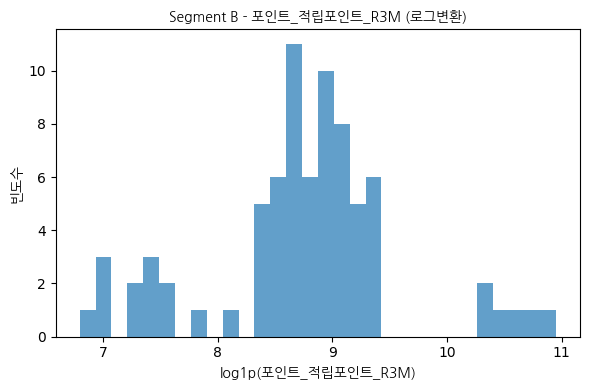

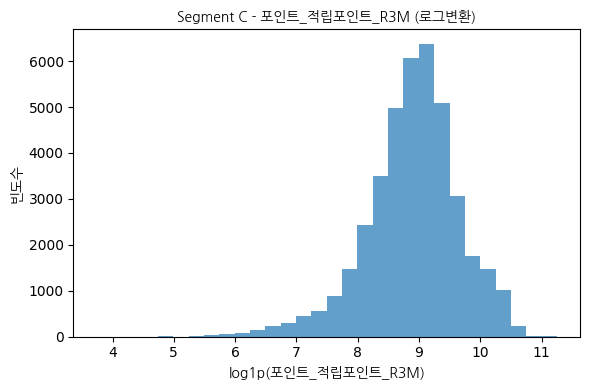

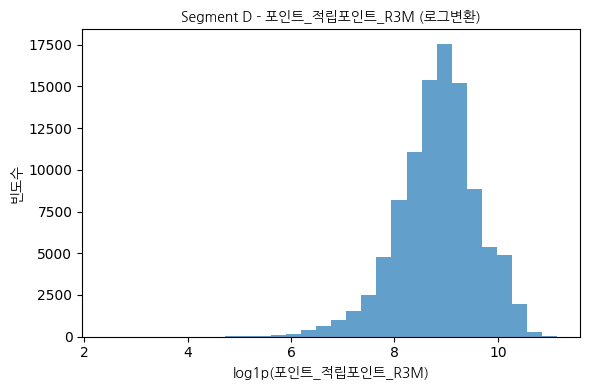

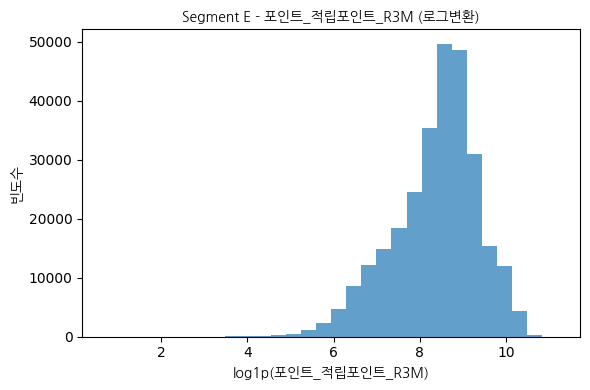

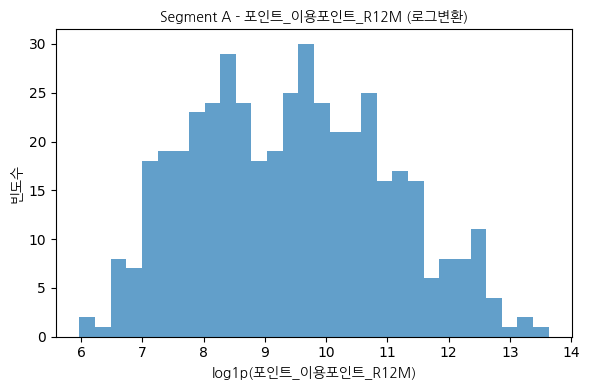

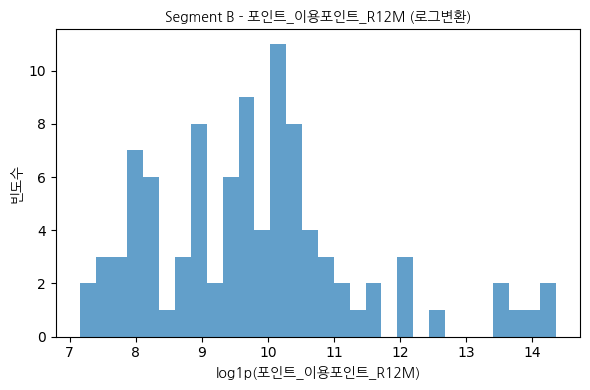

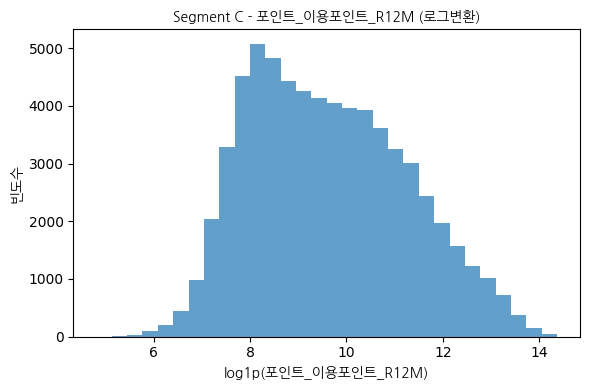

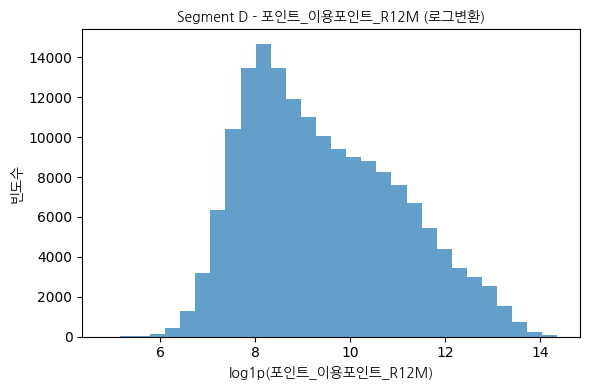

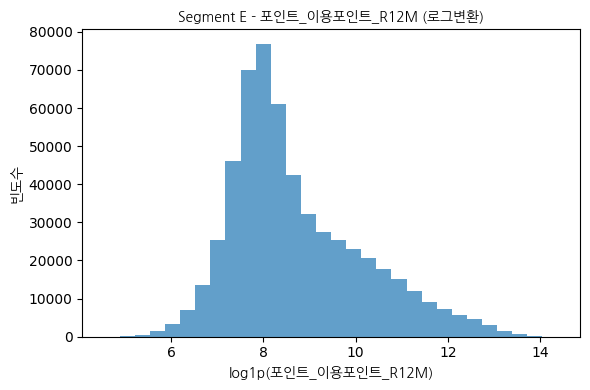

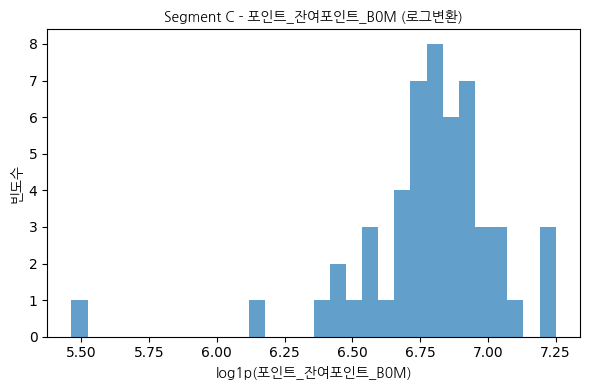

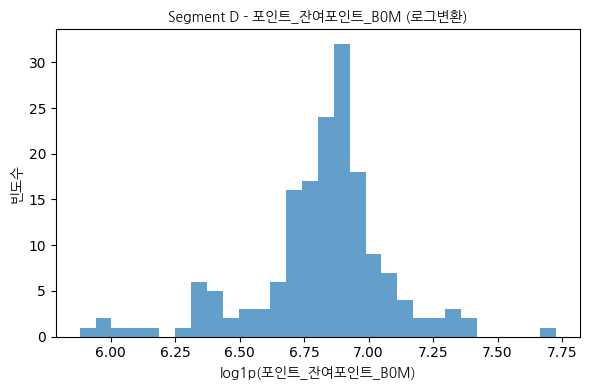

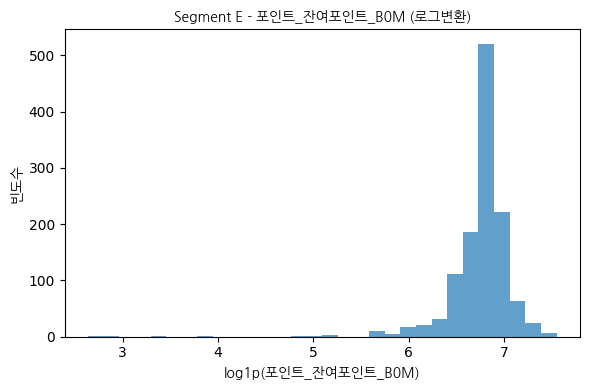

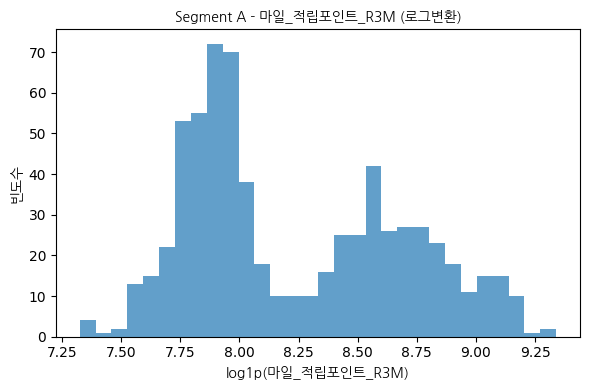

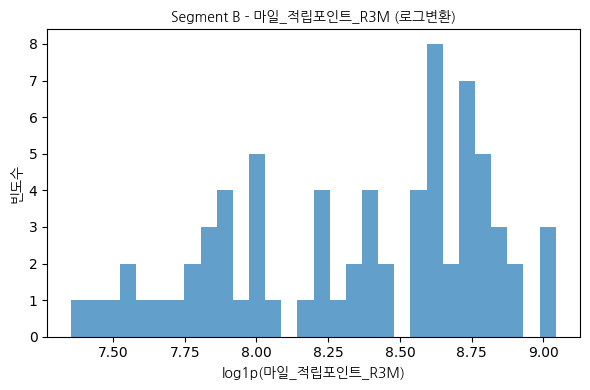

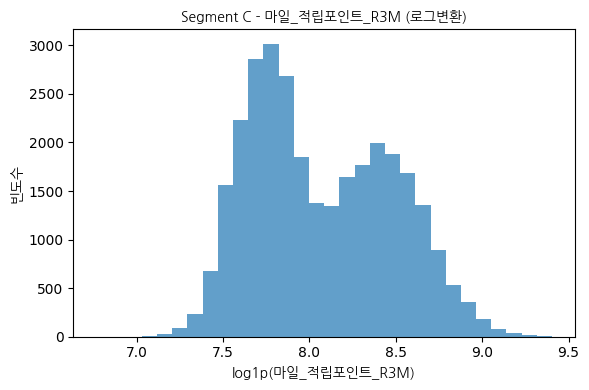

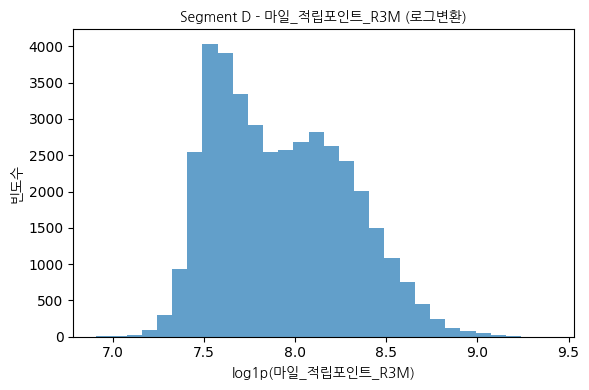

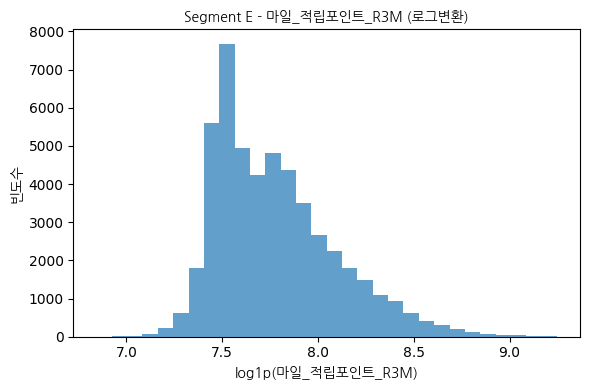

In [ ]:
point_cols = [
    '포인트_마일리지_건별_B0M',
    '포인트_포인트_건별_B0M',
    '포인트_마일리지_월적립_B0M',
    '포인트_포인트_월적립_B0M',
    '포인트_포인트_월적립_R3M',
    '포인트_적립포인트_R12M',
    '포인트_적립포인트_R3M',
    '포인트_이용포인트_R12M',
    '포인트_잔여포인트_B0M',
    '마일_적립포인트_R3M'
]

# 개별 변수에 대해 Segment별 로그변환 히스토그램 그리기
def plot_log_hist_segment_filtered(df, col, segment_col='Segment'):
    for seg in sorted(df[segment_col].dropna().unique()):
        data = df[(df[segment_col] == seg) & (df[col] > 0)][col].dropna()
        if len(data) == 0:
            continue
        plt.figure(figsize=(6, 4))
        plt.hist(np.log1p(data), bins=30, alpha=0.7)
        plt.title(f"Segment {seg} - {col} (로그변환)", fontproperties=font_prop)
        plt.xlabel(f"log1p({col})", fontproperties=font_prop)
        plt.ylabel("빈도수", fontproperties=font_prop)
        plt.tight_layout()
        plt.show()

# 실행: 모든 포인트 변수별로 시각화
for col in point_cols:
    plot_log_hist_segment_filtered(df_bill_reduced, col)
    #0인값이 너무 많아서 0인값은 제외하고 히스토그램그리기

# 할인 그룹

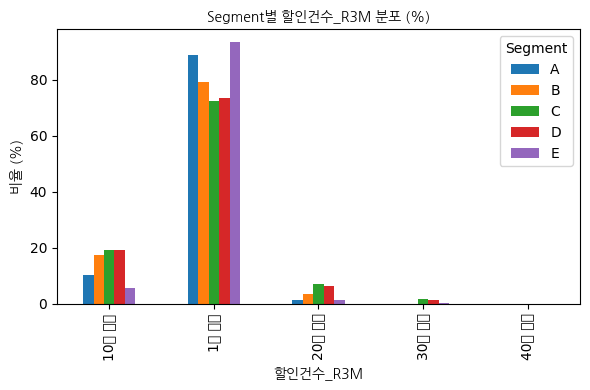

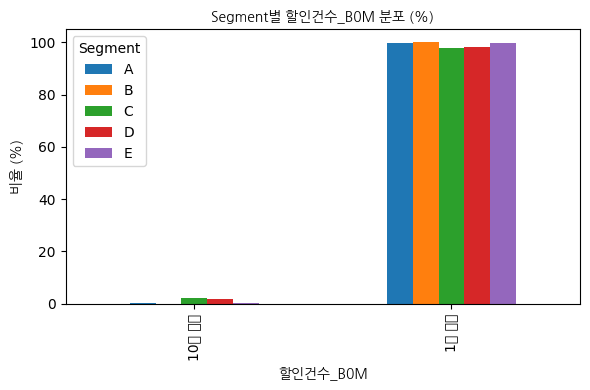

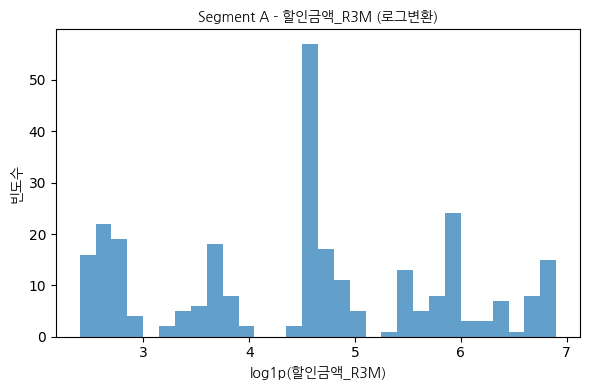

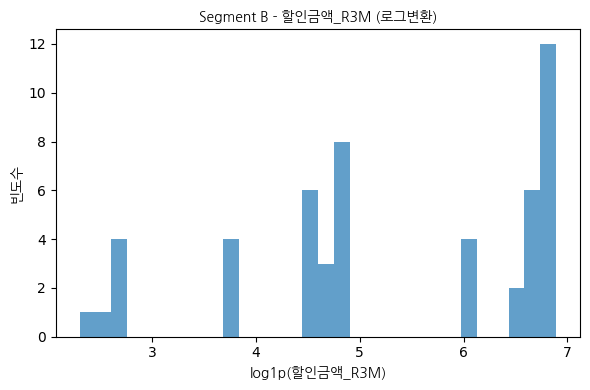

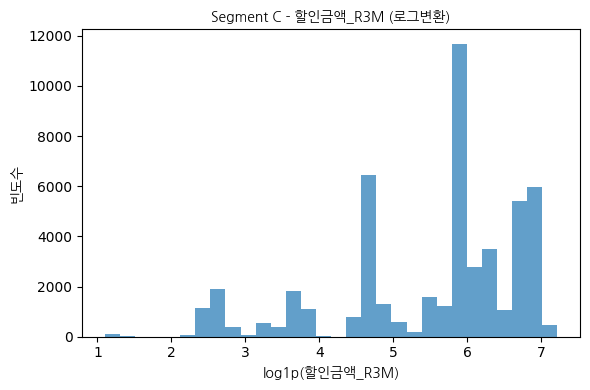

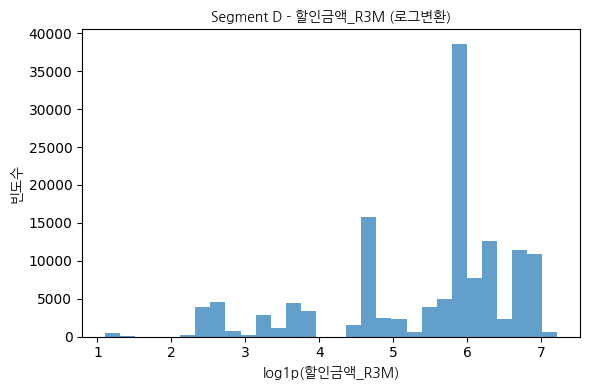

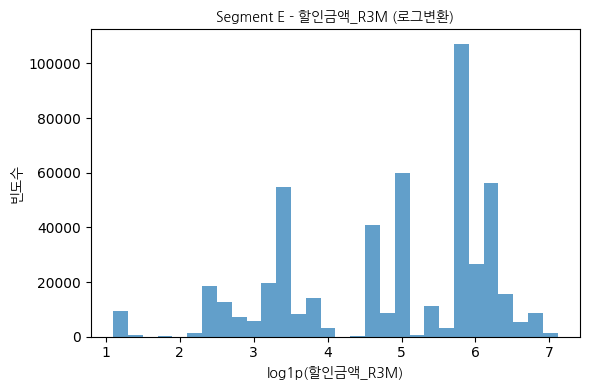

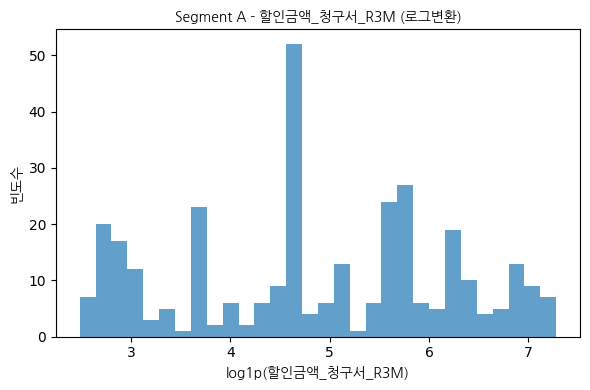

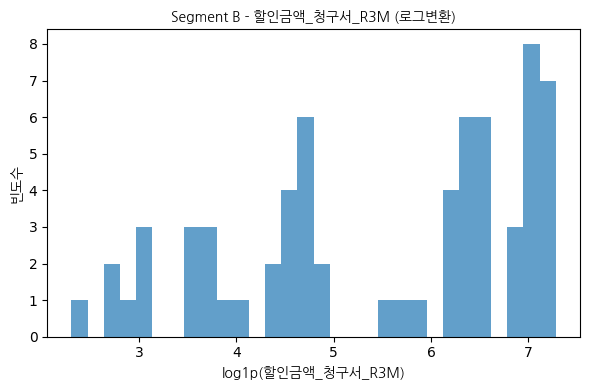

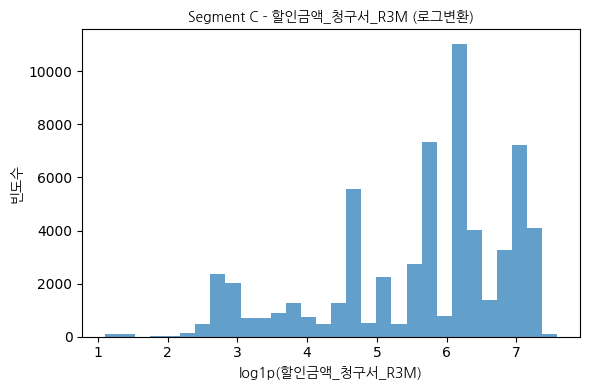

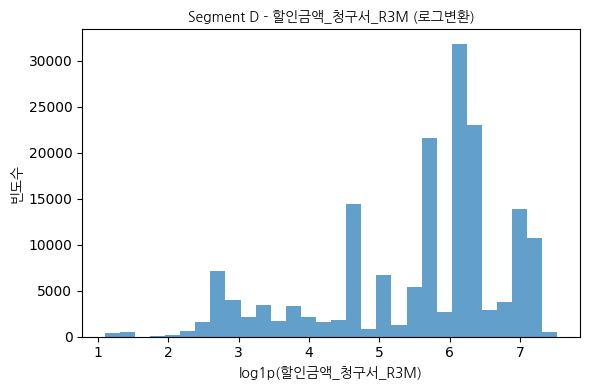

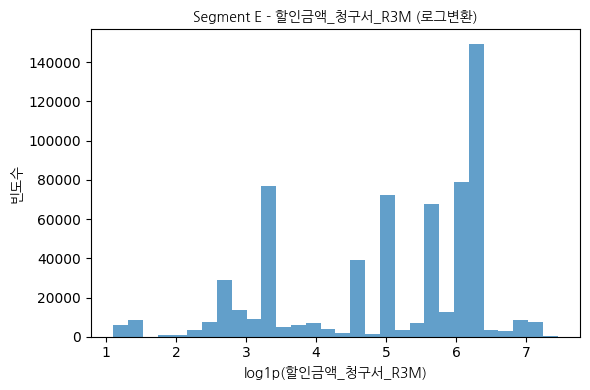

In [ ]:
# 할인 그룹 컬럼 분리
discount_count_cols = ['할인건수_R3M', '할인건수_B0M']
discount_amount_cols = ['할인금액_R3M', '할인금액_청구서_R3M']

# 바차트 함수 (범주형)
def plot_bar_by_segment(df, col, segment_col='Segment'):
    cross_tab = pd.crosstab(df[col], df[segment_col], normalize='columns') * 100
    cross_tab.plot(kind='bar', figsize=(6, 4))
    plt.title(f"Segment별 {col} 분포 (%)", fontproperties=font_prop)
    plt.xlabel(col, fontproperties=font_prop)
    plt.ylabel("비율 (%)", fontproperties=font_prop)
    plt.legend(title=segment_col)
    plt.tight_layout()
    plt.show()

# 로그 히스토그램 함수 (수치형)
def plot_log_hist_segment_filtered(df, col, segment_col='Segment'):
    df[col] = pd.to_numeric(df[col], errors='coerce')
    for seg in sorted(df[segment_col].dropna().unique()):
        data = df[(df[segment_col] == seg) & (df[col] > 0)][col].dropna()
        if len(data) == 0:
            continue
        plt.figure(figsize=(6, 4))
        plt.hist(np.log1p(data), bins=30, alpha=0.7)
        plt.title(f"Segment {seg} - {col} (로그변환)", fontproperties=font_prop)
        plt.xlabel(f"log1p({col})", fontproperties=font_prop)
        plt.ylabel("빈도수", fontproperties=font_prop)
        plt.tight_layout()
        plt.show()

# 범주형 바차트 시각화 실행
for col in discount_count_cols:
    plot_bar_by_segment(df_bill_reduced, col)

# 수치형 히스토그램 시각화 실행
for col in discount_amount_cols:
    plot_log_hist_segment_filtered(df_bill_reduced, col)

#연체선결제상환그룹

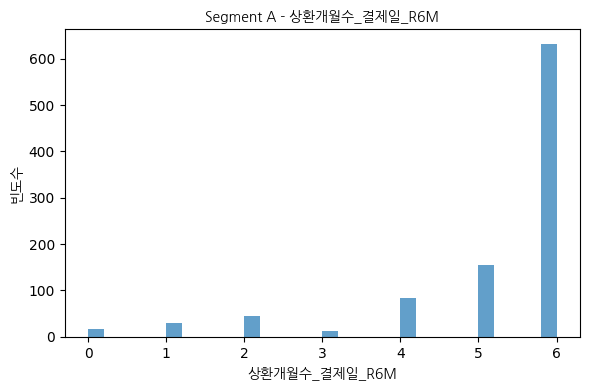

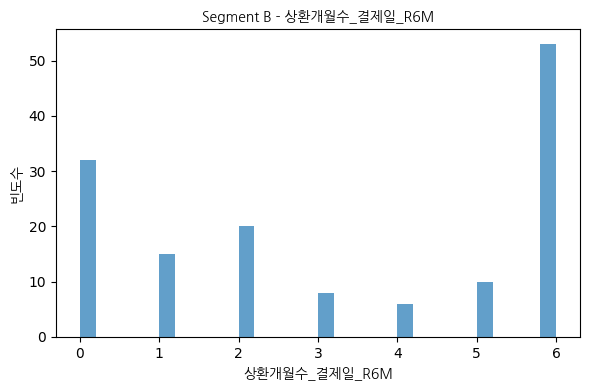

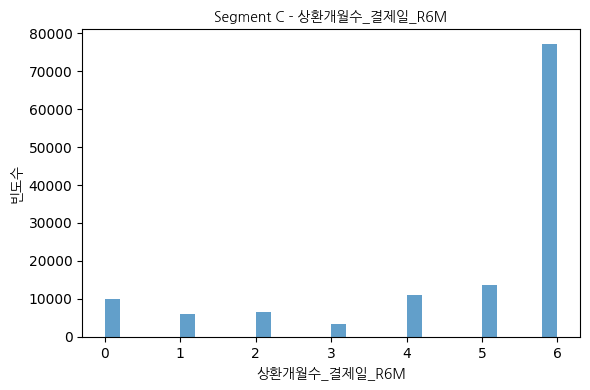

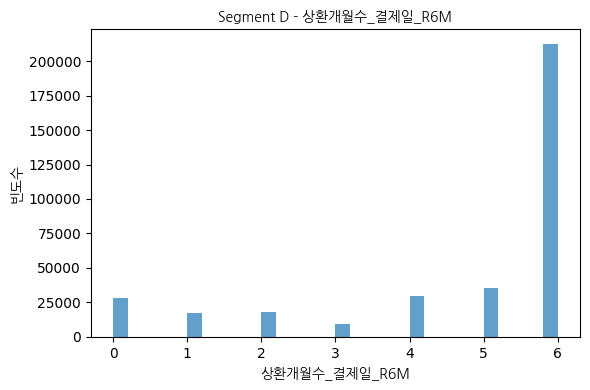

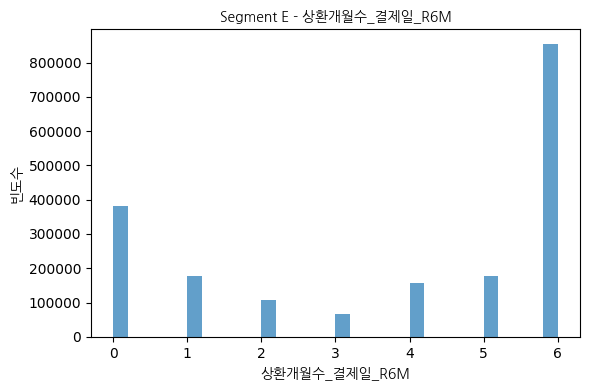

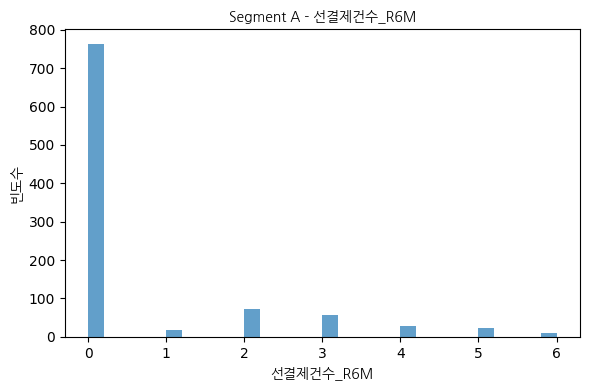

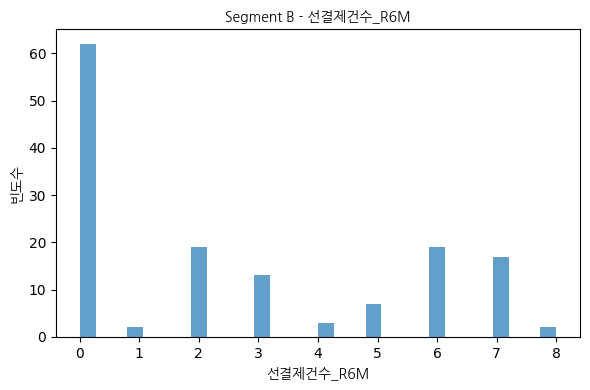

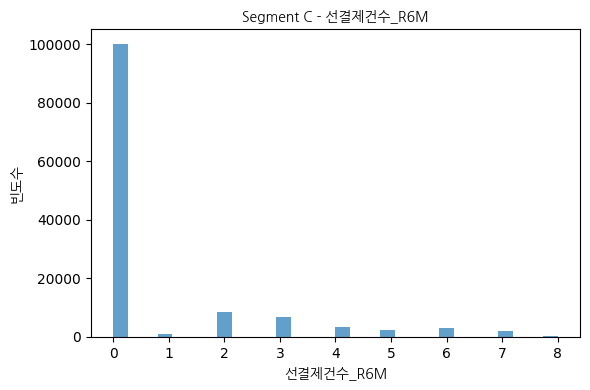

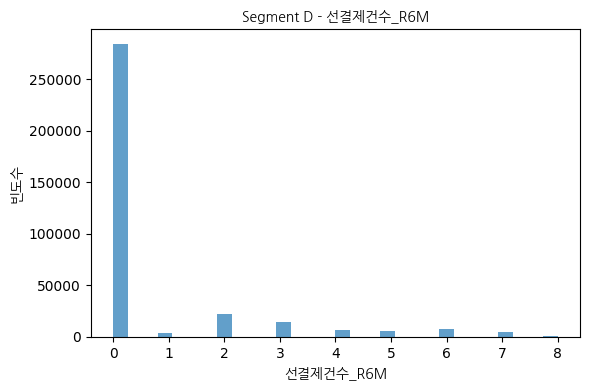

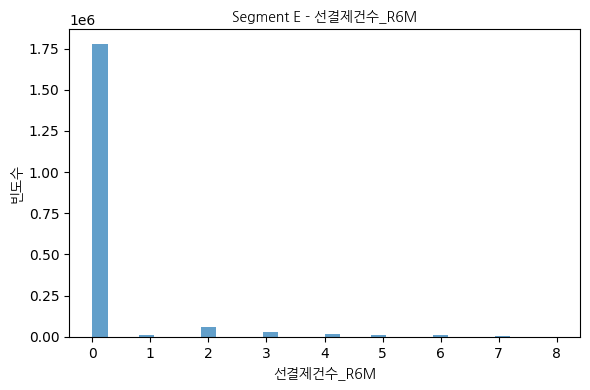

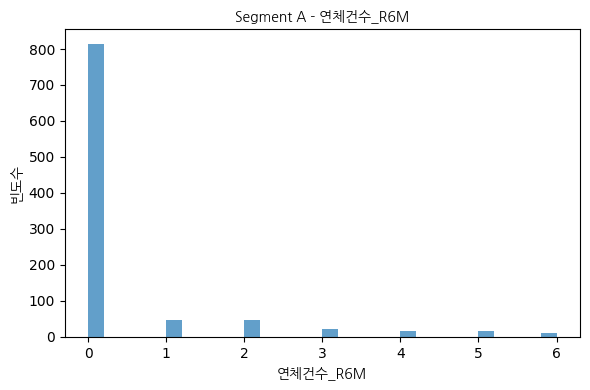

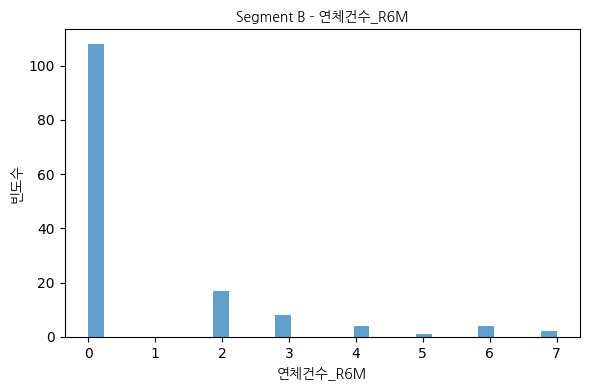

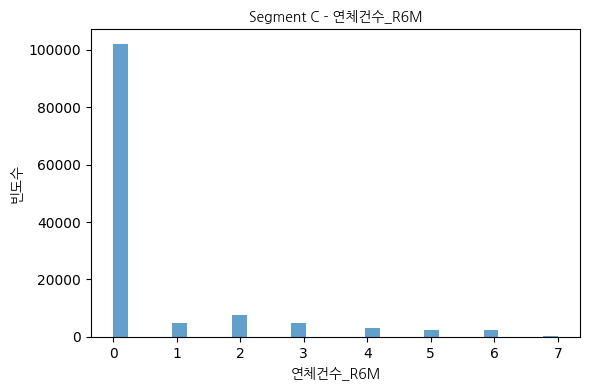

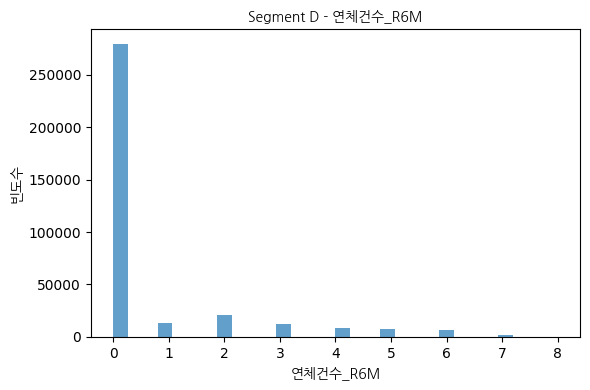

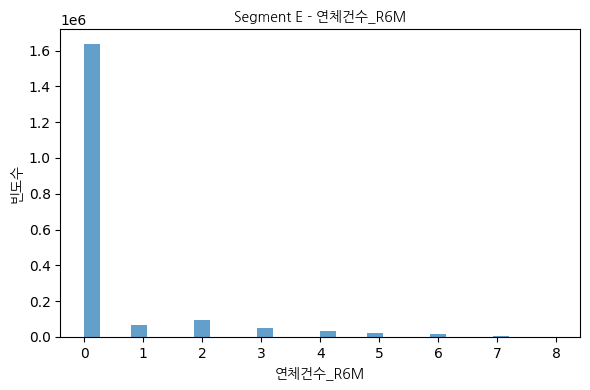

In [ ]:
# 연체·선결제·상환 그룹 컬럼 목록
risk_cols = [
    '상환개월수_결제일_R6M',
    '선결제건수_R6M',
    '연체건수_R6M'
]

# 시각화 함수: 로그변환 없이 Segment별 히스토그램
def plot_hist_segment(df, col, segment_col='Segment'):
    df[col] = pd.to_numeric(df[col], errors='coerce')
    for seg in sorted(df[segment_col].dropna().unique()):
        data = df[df[segment_col] == seg][col].dropna()
        if len(data) == 0:
            continue
        plt.figure(figsize=(6, 4))
        plt.hist(data, bins=30, alpha=0.7)
        plt.title(f"Segment {seg} - {col}", fontproperties=font_prop)
        plt.xlabel(col, fontproperties=font_prop)
        plt.ylabel("빈도수", fontproperties=font_prop)
        plt.tight_layout()
        plt.show()

# 실행
for col in risk_cols:
    plot_hist_segment(df_bill_reduced, col)

#혜택 그룹

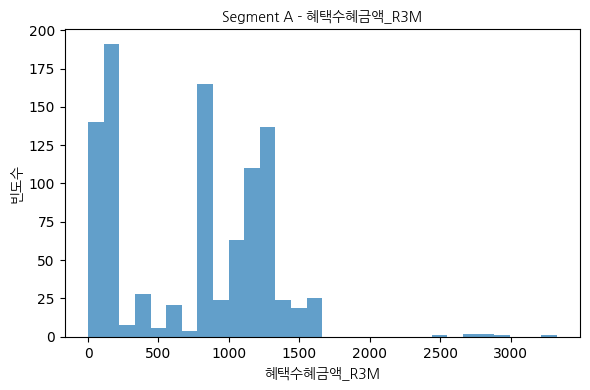

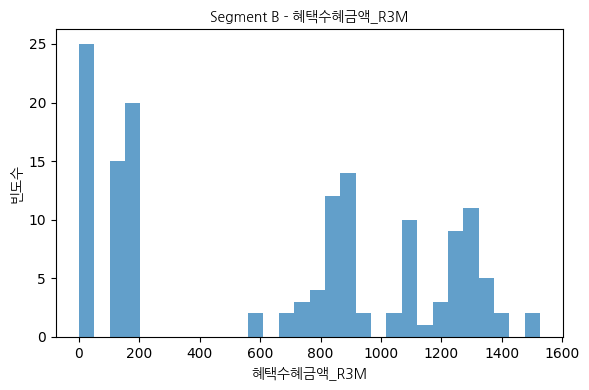

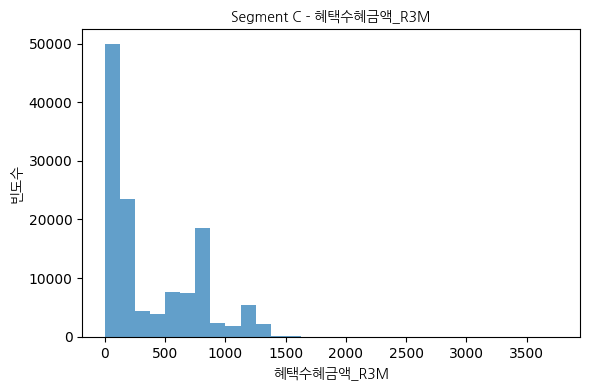

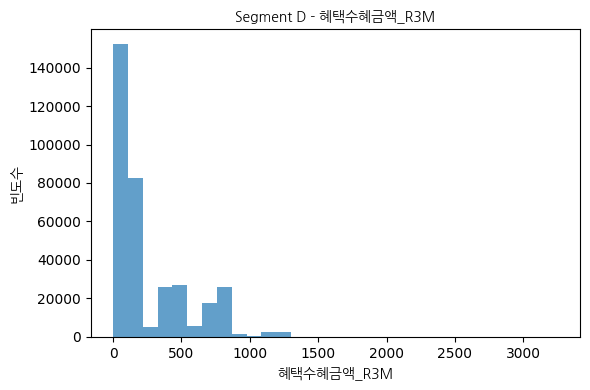

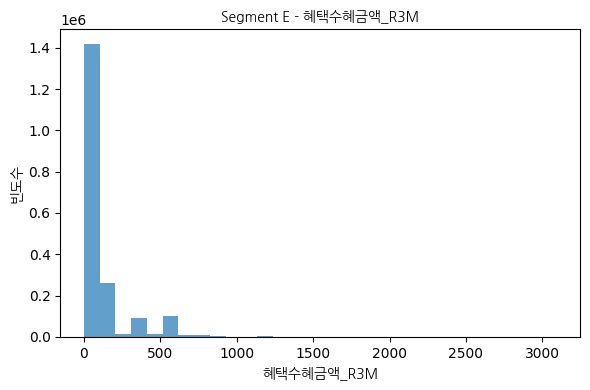

In [ ]:
# 혜택 그룹 컬럼
benefit_cols = ['혜택수혜금액_R3M']

# 시각화 함수
def plot_hist_segment(df, col, segment_col='Segment'):
    df[col] = pd.to_numeric(df[col], errors='coerce')
    for seg in sorted(df[segment_col].dropna().unique()):
        data = df[df[segment_col] == seg][col].dropna()
        if len(data) == 0:
            continue
        plt.figure(figsize=(6, 4))
        plt.hist(data, bins=30, alpha=0.7)
        plt.title(f"Segment {seg} - {col}", fontproperties=font_prop)
        plt.xlabel(col, fontproperties=font_prop)
        plt.ylabel("빈도수", fontproperties=font_prop)
        plt.tight_layout()
        plt.show()

# 실행
for col in benefit_cols:
    plot_hist_segment(df_bill_reduced, col)

## ✅ 청구입금정보 기반 EDA 인사이트 요약

---

### 🔹 1. 청구정보 그룹
- **인사이트**
  - `청구금액_B0`은 세그먼트 간 분포 차이가 존재하며 의미 있는 변수로 판단됨.
  - 그 외 `대표결제일`, `대표결제방법코드` 등은 세그먼트 간 패턴 차이가 미미함.
- **결론**
  - `청구금액_*` 변수는 **유지**,  
  - 나머지 변수는 **모델링에서 제외** 고려.

---

### 🔹 2. 청구서 수령 그룹 (범주형)
- **인사이트**
  - 수령 방법, 발송 여부 등 대부분의 컬럼이 세그먼트 간 분포 차이가 없음.
- **결론**
  - **전체 삭제** 제안.

---

### 🔹 3. 마일리지·포인트 그룹
- **인사이트**
  - Segment A와 B는 유사한 사용 패턴을 보이고, Segment C/D/E는 또 다른 유형으로 분포를 공유함.
- **결론**
  - 세그먼트 구분에 기여할 가능성이 있어 **전체 유지**.  
  - 추후 사용량 변화나 비율 등의 **파생 변수 활용도 고려 가능**.

---

### 🔹 4. 할인 그룹
- **인사이트**
  - `할인건수_B0M`은 대부분 1~10회 사이 분포, 세그먼트 간 차이 뚜렷하지 않음 → 인사이트 도출 어려움.
  - `할인건수_R3M` 및 `할인금액_R3M`은 일부 차이 존재하며 의미 있음.
- **결론**
  - `할인건수_B0M`은 **삭제**,  
  - 3개월 기준 변수(`할인건수_R3M`, `할인금액_R3M`) 중심으로 **통일 및 유지**.

---

### 🔹 5. 연체·선결제·상환 그룹
- **인사이트**
  - `상환개월수_결제일_R6M`: 대부분 6개월째 결제, Segment B/E는 미결제 비율 높음 → 차이 존재.
  - `선결제건수_R6M`: 대부분 0, B만 약간의 움직임 있음.
  - `연체건수_R6M`: 전체적으로 거의 0 → 정보 가치 낮음.
- **결론**
  - `상환개월수_결제일_R6M`: **유지**  
  - `선결제건수_R6M`: **조건부 유지**  
  - `연체건수_R6M`: **삭제**

---

### 🔹 6. 혜택 그룹
- **인사이트**
  - `혜택수혜금액_R3M`: Segment A/B와 C/D/E 간 분포 차이 존재 → 세그먼트 구분에 유의미함.
- **결론**
  - **유지**,  
  - 필요 시 A/B vs C/D/E 기반의 **파생 변수 생성 가능성 있음**.

---

## ✅ 최종 변수 정제 제안 요약

| 그룹               | 유지 변수                            | 제거 변수                         |
|--------------------|--------------------------------------|-----------------------------------|
| 청구정보            | 청구금액_B0,  | 대표결제일, 대표결제방법코드 등 |
| 청구서 수령         | 없음                                 | 전체 삭제                         |
| 마일리지·포인트     | 전체 유지                            | 없음                              |
| 할인               | 할인건수_R3M, 할인금액_R3M 유지       | 할인건수_B0M 삭제                 |
| 연체·선결제·상환     | 상환개월수_결제일_R6M 유지           | 연체건수_R6M 삭제                 |
| 혜택               | 혜택수혜금액_R3M 유지                | 없음                              |


# 인사이트 기반 데이터 삭제 및 최종 데이터정리

In [ ]:
# 드랍할 컬럼 리스트 정의
drop_cols = [
    # 청구정보 그룹 중 제외할 변수
    '대표결제일', '대표결제방법코드',

    # 청구서 수령 그룹 전체 제외
    '대표청구지고객주소구분코드', '대표청구서수령지구분코드', '청구서수령방법',
    '청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M',

    # 할인 그룹 중 제외
    '할인건수_B0M',

    # 연체·선결제·상환 그룹 중 제외
    '연체건수_R6M'
]

# 컬럼 삭제
df_bill_final = df_bill_reduced.drop(columns=drop_cols)

# 결과 확인
print(f"최종 변수 수: {df_bill_final.shape[1]}")
print("남은 컬럼:")
print(df_bill_final.columns.tolist())

최종 변수 수: 21
남은 컬럼:
['기준년월', 'ID', '청구금액_B0', '포인트_마일리지_건별_B0M', '포인트_포인트_건별_B0M', '포인트_마일리지_월적립_B0M', '포인트_포인트_월적립_B0M', '포인트_포인트_월적립_R3M', '포인트_적립포인트_R12M', '포인트_적립포인트_R3M', '포인트_이용포인트_R12M', '포인트_잔여포인트_B0M', '마일_적립포인트_R3M', '할인건수_R3M', '할인금액_R3M', '할인금액_청구서_R3M', '상환개월수_결제일_R6M', '선결제건수_R6M', '혜택수혜금액_R3M', 'Segment', '청구금액_B0_log']


In [ ]:
from google.colab import files

# CSV로 저장
df_bill_final.to_csv("청구입금정보_최종.csv", index=False, encoding='utf-8-sig')

# 다운로드 링크 제공
files.download("청구입금정보_최종.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>